In [ ]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys
train_labels = pd.read_csv("/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/train.csv")
test_labels = pd.read_csv("/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/test.csv")
# Create happy_images directory
happy_images ="/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/happy_images"
train = "/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/train/"
test = "/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/test/"

if not os.path.exists (train):
  os.mkdir (train)

for filename, class_name in train_labels.values:
  # Create subdirectory with class name
  if not os.path.exists(train + str(class_name)):
    os.mkdir(train + str(class_name))
  src_path = happy_images +'/'+ filename +'.jpg'
  dst_path = train + str(class_name) + '/' + filename +'.jpg'
  try:
    shutil.copy(src_path, dst_path)
    print("sucessful")
  except IOError as e:
    print('Unable to copy file {1 to fl'
            .format(src_path, dst_path))
  except:
    print('when try copy file {1 to {, unexpected error: {}'
          .format (src_path, dst_path, sys.exc_info()))

if not os.path.exists (test):
  os.mkdir (test)

for filename, class_name in test_labels.values:
  # Create subdirectory with class name
  if not os.path.exists(test + str(class_name)):
    os.mkdir(test + str(class_name))
  src_path = happy_images +'/'+ filename +'.jpg'
  dst_path = test + str(class_name) + '/' + filename +'.jpg'
  try:
    shutil.copy(src_path, dst_path)
    print("sucessful")
  except IOError as e:
    print('Unable to copy file {1 to fl'
            .format (src_path, dst_path))
  except:
    print('when try copy file {1 to {, unexpected error: {}'
          .format (src_path, dst_path, sys.exc_info()))

Streaming output truncated to the last 5000 lines.
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install split-folders

In [ ]:
import splitfolders # or import split folders
input_folder = "/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/train"

splitfolders.ratio(input_folder, output="/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/Val_Train", seed=42, ratio=(.8,.2),group_prefix=None)

Copying files: 4830 files [01:16, 62.79 files/s]


In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten, Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow. keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
img_height, img_width = (224,224)
batch_size = 32
train_data_dir = "/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/Val_Train/train"
valid_data_dir = "/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/Val_Train/val"
test_data_dir = "/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/test"

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
                  train_data_dir,
                  target_size=(img_height, img_width),
                  batch_size=batch_size,
                  class_mode='categorical')

valid_generator = train_datagen.flow_from_directory(
                  valid_data_dir, 
                  target_size=(img_height, img_width),
                  batch_size=batch_size,
                  class_mode= 'categorical')              

Found 3862 images belonging to 3 classes.
Found 968 images belonging to 3 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
                test_data_dir, 
                target_size=(img_height, img_width),
                batch_size=1,
                class_mode='categorical')

Found 1610 images belonging to 3 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)

x = Dense(512, activation='relu')(x)

x = Dense(1024, activation='relu')(x)

predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [ ]:
m = model.fit_generator(train_generator,
steps_per_epoch = len(train_generator),
epochs= 20,
validation_data= valid_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
121/121 [==============================] - 84s 663ms/step - loss: 0.7900 - accuracy: 0.6911 - val_loss: 0.7363 - val_accuracy: 0.7035
Epoch 2/20
121/121 [==============================] - 77s 640ms/step - loss: 0.7000 - accuracy: 0.7131 - val_loss: 0.6725 - val_accuracy: 0.7479
Epoch 3/20
121/121 [==============================] - 77s 639ms/step - loss: 0.6738 - accuracy: 0.7320 - val_loss: 0.6563 - val_accuracy: 0.7469
Epoch 4/20
121/121 [==============================] - 78s 642ms/step - loss: 0.6549 - accuracy: 0.7382 - val_loss: 0.6573 - val_accuracy: 0.7593
Epoch 5/20
121/121 [==============================] - 77s 638ms/step - loss: 0.6390 - accuracy: 0.7566 - val_loss: 0.6321 - val_accuracy: 0.7645
Epoch 6/20
121/121 [==============================] - 77s 639ms/step - loss: 0.6243 - accuracy: 0.7595 - val_loss: 0.6460 - val_accuracy: 0.7717
Epoch 7/20
121/121 [==============================] - 77s 639ms/step - loss: 0.6128 - accuracy: 0.7639 - val_loss: 0.6211 - val_ac

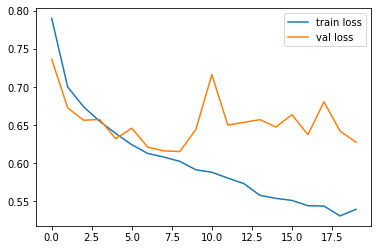

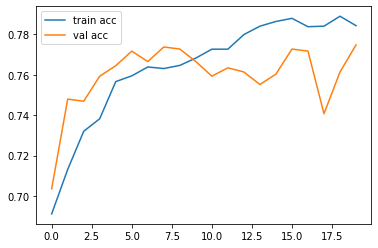

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(m.history['loss'], label='train loss')
plt.plot(m.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(m.history['accuracy'], label='train acc')
plt.plot(m.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save("/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/ResNet_model.h5")

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print ('InTest accuracy:', test_acc)

1610/1610 - 41s - loss: 0.6033 - accuracy: 0.7820 - 41s/epoch - 26ms/step
InTest accuracy: 0.7819875478744507


In [ ]:
result=model.evaluate(test_generator)

1610/1610 [==============================] - 45s 28ms/step - loss: 0.6039 - accuracy: 0.7776


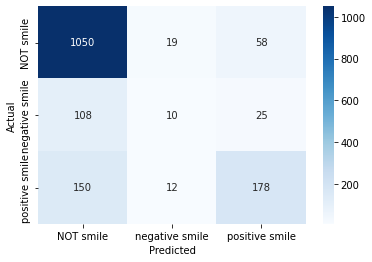

test accuracy : 76.8944099378882


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/I'mbesideyou/data.zip (Unzipped Files)/I'mbesideyou/ResNet_model.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  x_test, y_test = test_generator.next()
  y_prob.append(model.predict(x_test))
  y_act.append(y_test)
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]
out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()
print('test accuracy : {}'.format ((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))